In [1]:
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.datasets import ImageFolder
import torch
from torchmetrics import Accuracy, F1Score, Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, ConcatDataset
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [35]:
data = ImageFolder('../data_retrieval/data', ResNet101_Weights.IMAGENET1K_V2.transforms())
targets = data.targets
train_indices, test_val_indices = train_test_split(np.arange(len(targets)), stratify=targets, train_size=0.65, random_state=21)
train_data = Subset(data, indices=train_indices)

In [3]:
val_test_data = Subset(data, indices=test_val_indices)
targets = np.array(targets)
test_val_targets = targets[test_val_indices]
test_indices, val_indices = train_test_split(test_val_indices, stratify=test_val_targets, train_size=0.57, random_state=21)
val_data, test_data = Subset(data, indices=val_indices), Subset(data, indices=test_indices)

In [4]:
print("Length of train set:", len(train_data))
print("Length of val set:", len(val_data))
print("Length of test set:", len(test_data))

Length of train set: 5395
Length of val set: 1250
Length of test set: 1656


In [5]:
model = resnet101()

In [6]:
model.load_state_dict(torch.load('../models/models_weights/resnet101_all_data.pth'))

<All keys matched successfully>

In [7]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
test_loader = torch.utils.data.DataLoader(test_data,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)

In [9]:
print("Size of test dataset:", len(test_data))

Size of test dataset: 1656


In [10]:
idx_to_class = {v: k for k, v in test_data.dataset.class_to_idx.items()}

In [37]:
from collections import Counter
amount_of_samples = Counter()
for image, label in data:
    amount_of_samples[idx_to_class[label]]+=1


In [45]:
print(set(amount_of_samples))

{'E_Neo-Assyrian', 'TA_Neo-Assyrian', 'NI_Neo-Assyrian', 'TI_Neo-Babylonian', 'MEŠ_Neo-Assyrian', 'NI_Neo-Babylonian', 'RU_Neo-Assyrian', 'U₂_Neo-Babylonian', 'TA_Neo-Babylonian', 'RU_Neo-Babylonian', 'KI_Neo-Babylonian', 'KA_Neo-Babylonian', 'MEŠ_Neo-Babylonian', 'GAR_Neo-Assyrian', 'KA_Neo-Assyrian', 'TI_Neo-Assyrian', 'ŠU_Neo-Assyrian', 'ŠU_Neo-Babylonian', 'KI_Neo-Assyrian', 'U₂_Neo-Assyrian', 'GAR_Neo-Babylonian', 'E_Neo-Babylonian'}


In [46]:
class_counts = dict(sorted({label: amount_of_samples[label] for label in set(amount_of_samples)}.items(), key=lambda x: x[1], reverse=True))

In [47]:
class_counts

{'GAR_Neo-Babylonian': 1215,
 'KI_Neo-Babylonian': 836,
 'U₂_Neo-Babylonian': 670,
 'MEŠ_Neo-Babylonian': 594,
 'NI_Neo-Babylonian': 510,
 'ŠU_Neo-Babylonian': 481,
 'E_Neo-Babylonian': 437,
 'TA_Neo-Babylonian': 436,
 'KA_Neo-Babylonian': 403,
 'TI_Neo-Babylonian': 395,
 'RU_Neo-Babylonian': 372,
 'GAR_Neo-Assyrian': 254,
 'KI_Neo-Assyrian': 228,
 'NI_Neo-Assyrian': 200,
 'U₂_Neo-Assyrian': 188,
 'MEŠ_Neo-Assyrian': 173,
 'TA_Neo-Assyrian': 160,
 'KA_Neo-Assyrian': 157,
 'TI_Neo-Assyrian': 157,
 'ŠU_Neo-Assyrian': 153,
 'E_Neo-Assyrian': 142,
 'RU_Neo-Assyrian': 140}

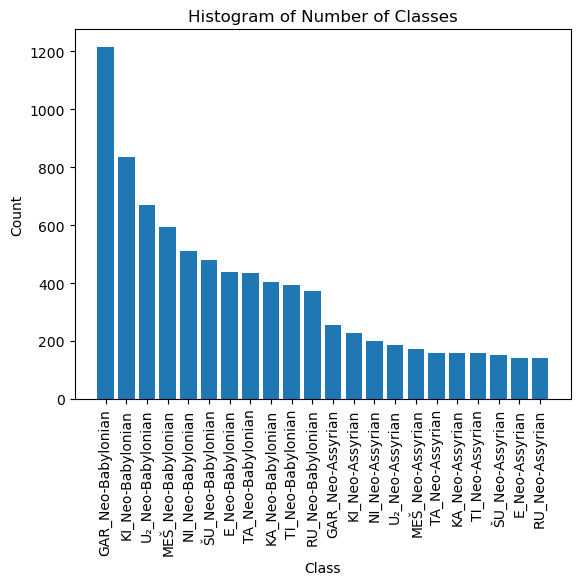

In [48]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Number of Classes')
plt.xticks(rotation=90)
plt.show()

In [11]:
print(idx_to_class)

{0: 'E_Neo-Assyrian', 1: 'E_Neo-Babylonian', 2: 'GAR_Neo-Assyrian', 3: 'GAR_Neo-Babylonian', 4: 'KA_Neo-Assyrian', 5: 'KA_Neo-Babylonian', 6: 'KI_Neo-Assyrian', 7: 'KI_Neo-Babylonian', 8: 'MEŠ_Neo-Assyrian', 9: 'MEŠ_Neo-Babylonian', 10: 'NI_Neo-Assyrian', 11: 'NI_Neo-Babylonian', 12: 'RU_Neo-Assyrian', 13: 'RU_Neo-Babylonian', 14: 'TA_Neo-Assyrian', 15: 'TA_Neo-Babylonian', 16: 'TI_Neo-Assyrian', 17: 'TI_Neo-Babylonian', 18: 'U₂_Neo-Assyrian', 19: 'U₂_Neo-Babylonian', 20: 'ŠU_Neo-Assyrian', 21: 'ŠU_Neo-Babylonian'}


In [23]:
data, labels = next(iter(test_loader))

In [24]:
with torch.no_grad():
    outputs = model(data)

# Get predicted labels
_, predicted = torch.max(outputs, 1)

In [31]:
import seaborn_image as isns

ModuleNotFoundError: No module named 'seaborn_image'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

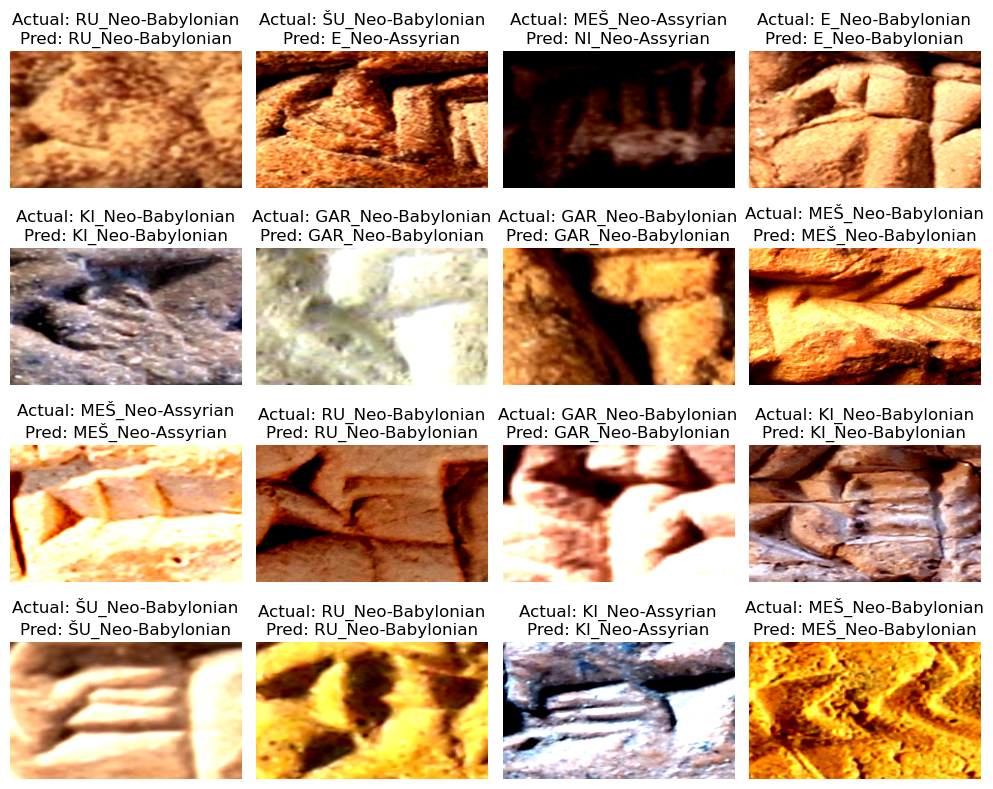

In [34]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), aspect='auto')

# Show the images and their labels
plt.figure(figsize=(10, 8))
for i in range(len(data)):
    plt.subplot(4, 4, i + 1)
    imshow(data[i])
    plt.title(f'Actual: {test_loader.dataset.dataset.classes[labels[i]]}\nPred: {test_loader.dataset.dataset.classes[predicted[i]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
correct_pred = {classname: 0 for classname in idx_to_class}
total_pred = {classname: 0 for classname in idx_to_class}
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if idx_to_class[int(label)] == idx_to_class[(int(prediction))]:
                correct_pred[int(label)] += 1
            total_pred[int(label)] += 1

In [13]:
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {idx_to_class[classname]:5s} is {accuracy:.1f} %')

Accuracy for class: E_Neo-Assyrian is 89.3 %
Accuracy for class: E_Neo-Babylonian is 90.8 %
Accuracy for class: GAR_Neo-Assyrian is 86.3 %
Accuracy for class: GAR_Neo-Babylonian is 96.3 %
Accuracy for class: KA_Neo-Assyrian is 90.3 %
Accuracy for class: KA_Neo-Babylonian is 90.0 %
Accuracy for class: KI_Neo-Assyrian is 82.6 %
Accuracy for class: KI_Neo-Babylonian is 91.0 %
Accuracy for class: MEŠ_Neo-Assyrian is 91.4 %
Accuracy for class: MEŠ_Neo-Babylonian is 95.0 %
Accuracy for class: NI_Neo-Assyrian is 95.0 %
Accuracy for class: NI_Neo-Babylonian is 94.1 %
Accuracy for class: RU_Neo-Assyrian is 82.1 %
Accuracy for class: RU_Neo-Babylonian is 79.7 %
Accuracy for class: TA_Neo-Assyrian is 87.5 %
Accuracy for class: TA_Neo-Babylonian is 94.3 %
Accuracy for class: TI_Neo-Assyrian is 83.9 %
Accuracy for class: TI_Neo-Babylonian is 83.5 %
Accuracy for class: U₂_Neo-Assyrian is 78.9 %
Accuracy for class: U₂_Neo-Babylonian is 91.7 %
Accuracy for class: ŠU_Neo-Assyrian is 90.3 %
Accuracy for

In [14]:
print("Overall accuracy: ",sum(correct_pred.values()) / sum(total_pred.values()))

Overall accuracy:  0.9039855072463768


In [15]:
true_values = torch.zeros(len(test_data), dtype=torch.int64)
preds = torch.zeros(len(test_data), 1000)
counter = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        for pred,label  in zip(outputs, labels):
            preds[counter] = pred
            true_values[counter] = int(label)
            counter += 1
            

In [16]:
accuracy_2 = Accuracy('multiclass', num_classes=1000, top_k=2)
accuracy_3 = Accuracy('multiclass', num_classes=1000, top_k=3)
top_2 = accuracy_2(preds, true_values)
top_3 = accuracy_3(preds, true_values)
print("Overall Top-2 accuracy: ",float(top_2))
print("Overall Top-3 accuracy: ",float(top_3))

Overall Top-2 accuracy:  0.9522947072982788
Overall Top-3 accuracy:  0.9692028760910034


In [17]:
cf_matrix = confusion_matrix(true_values, torch.max(preds,1)[1])
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [idx_to_class[i] for i in idx_to_class],
                    columns = [idx_to_class[i] for i in idx_to_class])

In [18]:
df_cm

,E_Neo-Assyrian,E_Neo-Babylonian,GAR_Neo-Assyrian,GAR_Neo-Babylonian,KA_Neo-Assyrian,KA_Neo-Babylonian,KI_Neo-Assyrian,KI_Neo-Babylonian,MEŠ_Neo-Assyrian,MEŠ_Neo-Babylonian,...,RU_Neo-Assyrian,RU_Neo-Babylonian,TA_Neo-Assyrian,TA_Neo-Babylonian,TI_Neo-Assyrian,TI_Neo-Babylonian,U₂_Neo-Assyrian,U₂_Neo-Babylonian,ŠU_Neo-Assyrian,ŠU_Neo-Babylonian
E_Neo-Assyrian,0.892857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000
E_Neo-Babylonian,0.000000,0.908046,0.000000,0.011494,0.000000,0.011494,0.000000,0.022989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000,0.000000,0.022989,0.000000,0.000000
GAR_Neo-Assyrian,0.000000,0.000000,0.862745,0.117647,0.000000,0.000000,0.000000,0.019608,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GAR_Neo-Babylonian,0.000000,0.000000,0.008264,0.962810,0.000000,0.000000,0.000000,0.000000,0.000000,0.012397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004132,0.000000,0.004132
KA_Neo-Assyrian,0.000000,0.000000,0.000000,0.000000,0.903226,0.032258,0.032258,0.000000,0.032258,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
KA_Neo-Babylonian,0.000000,0.000000,0.000000,0.012500,0.012500,0.900000,0.025000,0.012500,0.000000,0.012500,...,0.000000,0.012500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500
KI_Neo-Assyrian,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.826087,0.043478,0.000000,0.043478,...,0.021739,0.000000,0.021739,0.000000,0.000000,0.000000,0.000000,0.000000,0.021739,0.000000
KI_Neo-Babylonian,0.000000,0.005988,0.000000,0.005988,0.000000,0.005988,0.005988,0.910180,0.000000,0.000000,...,0.000000,0.011976,0.000000,0.011976,0.000000,0.000000,0.000000,0.000000,0.000000,0.041916
MEŠ_Neo-Assyrian,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.914286,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000
MEŠ_Neo-Babylonian,0.000000,0.000000,0.000000,0.016807,0.000000,0.000000,0.000000,0.008403,0.000000,0.949580,...,0.008403,0.000000,0.000000,0.000000,0.000000,0.008403,0.000000,0.000000,0.000000,0.000000


In [18]:
cm_dict = df_cm.to_dict()

In [19]:
print(cm_dict)

{'E_Neo-Assyrian': {'E_Neo-Assyrian': 0.8297872340425532, 'E_Neo-Babylonian': 0.04081632653061224, 'GAR_Neo-Assyrian': 0.0, 'GAR_Neo-Babylonian': 0.0, 'KA_Neo-Assyrian': 0.0, 'KA_Neo-Babylonian': 0.0, 'KI_Neo-Assyrian': 0.0, 'KI_Neo-Babylonian': 0.0, 'MEŠ_Neo-Assyrian': 0.0, 'MEŠ_Neo-Babylonian': 0.0, 'NI_Neo-Assyrian': 0.0, 'NI_Neo-Babylonian': 0.0, 'RU_Neo-Assyrian': 0.0, 'RU_Neo-Babylonian': 0.0, 'TA_Neo-Assyrian': 0.0, 'TA_Neo-Babylonian': 0.0, 'TI_Neo-Assyrian': 0.0, 'TI_Neo-Babylonian': 0.0, 'U₂_Neo-Assyrian': 0.0, 'U₂_Neo-Babylonian': 0.0, 'ŠU_Neo-Assyrian': 0.0, 'ŠU_Neo-Babylonian': 0.0}, 'E_Neo-Babylonian': {'E_Neo-Assyrian': 0.02127659574468085, 'E_Neo-Babylonian': 0.8571428571428571, 'GAR_Neo-Assyrian': 0.0, 'GAR_Neo-Babylonian': 0.0, 'KA_Neo-Assyrian': 0.0, 'KA_Neo-Babylonian': 0.0, 'KI_Neo-Assyrian': 0.0, 'KI_Neo-Babylonian': 0.0, 'MEŠ_Neo-Assyrian': 0.0, 'MEŠ_Neo-Babylonian': 0.0, 'NI_Neo-Assyrian': 0.0, 'NI_Neo-Babylonian': 0.0, 'RU_Neo-Assyrian': 0.02631578947368421, 'R

<Axes: >

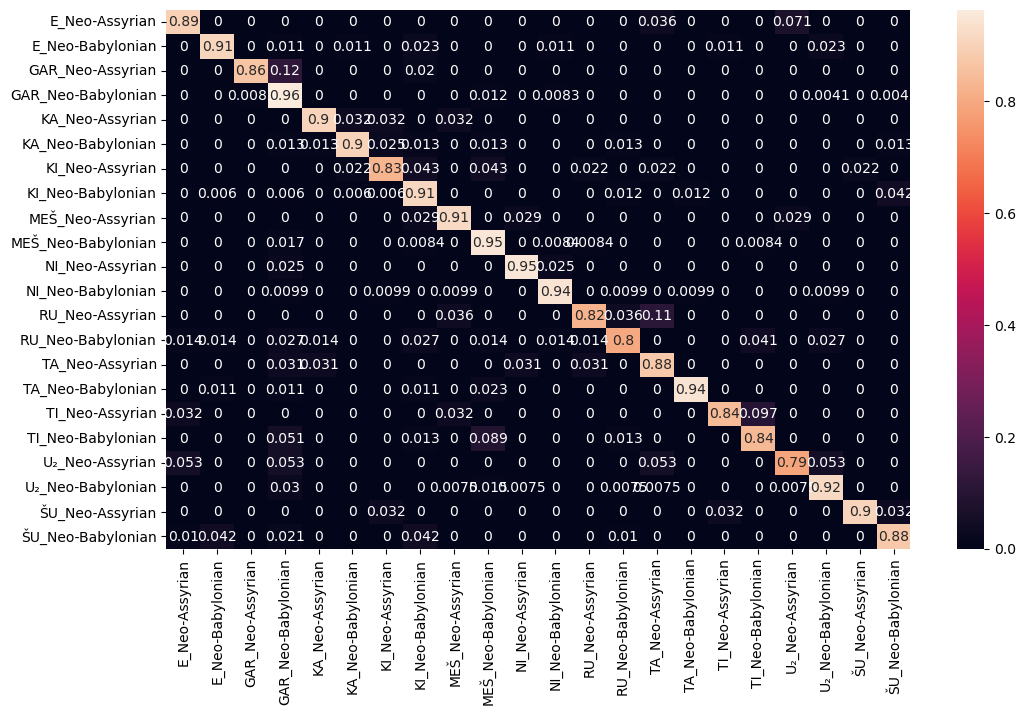

In [19]:
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [20]:
precision = Precision('multiclass',num_classes=22,average='none')

In [21]:
precision_each_class = precision(torch.max(preds,1)[1], true_values)

In [22]:
print(precision_each_class)

tensor([0.8333, 0.9186, 0.9565, 0.8893, 0.9032, 0.9474, 0.8636, 0.9048, 0.8649,
        0.8626, 0.9268, 0.9406, 0.8519, 0.8806, 0.7778, 0.9647, 0.9286, 0.9041,
        0.8824, 0.9385, 0.9655, 0.8936])
